# Handling Imbalanced Classes

Dataset download -> [aqui](https://github.com/aswintechguy/Data-Science-Concepts/blob/main/Machine%20Learning/data/creditcard.rar)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
x = df.drop(columns=['Class'], axis=1)
y = df['Class']

c:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
Counter({0: 284315, 1: 492})


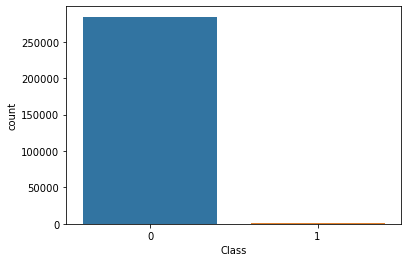

In [7]:
import seaborn as sns
from collections import Counter
print(sns.countplot(y))
print(Counter(y))

## Over Sampling Techniques

### RandomOverSampler

In [8]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversampler.fit_resample(x, y)
Counter(y_over)

Counter({0: 284315, 1: 284315})

In [10]:
oversampler = RandomOverSampler(sampling_strategy=0.3)
x_over, y_over = oversampler.fit_resample(x, y)
Counter(y_over)

Counter({0: 284315, 1: 85294})

### Smote (Synthetic Minority Over-sampling Technique)

c:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
Counter({0: 284315, 1: 113726})


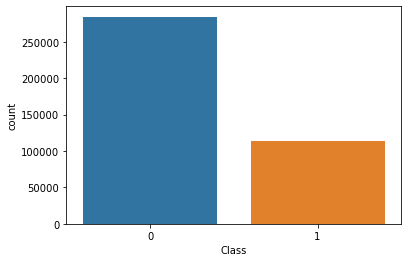

In [11]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(sampling_strategy=0.4)
x_over, y_over = oversampler.fit_resample(x, y)
print(sns.countplot(y_over))
print(Counter(y_over))

## Under Sampling Technique

### Random Under Sampling

c:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
Counter({0: 492, 1: 492})


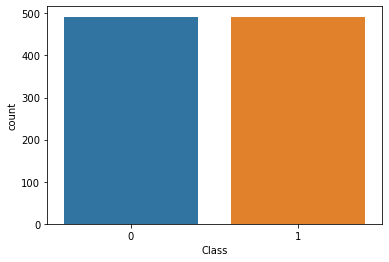

In [14]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersampler.fit_resample(x, y)
print(sns.countplot(y_under))
print(Counter(y_under))

c:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
Counter({0: 2460, 1: 492})


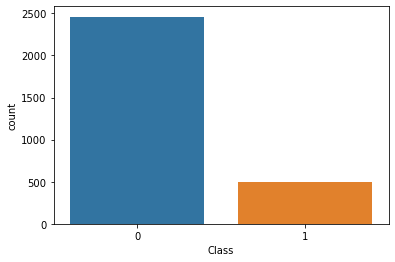

In [15]:
undersampler = RandomUnderSampler(sampling_strategy=0.2)
x_under, y_under = undersampler.fit_resample(x, y)
print(sns.countplot(y_under))
print(Counter(y_under))

## Combine Oversampling and Undersampling

c:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
Counter({0: 56862, 1: 28431})


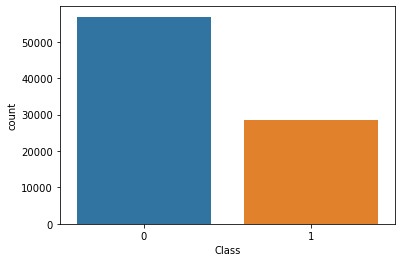

In [20]:
from imblearn.pipeline import Pipeline
oversampler = RandomOverSampler(sampling_strategy=0.1)
undersampler = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline([('o', oversampler), ('u', undersampler)])
x_resample, y_resample = pipeline.fit_resample(x, y)
print(sns.countplot(y_resample))
print(Counter(y_resample))